In [3]:
import sys
sys.path.insert(0,'/home/olgan96/.env/lib/python3.11/site-packages/')

In [4]:
import umap.umap_ as umap

In [5]:
import matplotlib.pyplot as plt

/home/olgan96/.env/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [6]:
import pandas as pd

In [7]:
import seaborn as sns

In [8]:
df = pd.read_parquet('../../NO_BACKUP/lincs_2020/signature_response_features_r2_top0.7_final.parquet')

# Expression features of all genes### Gene expression features

## UMAP

In [11]:
cols_expr = df.columns[2057:14385]

In [12]:
X = df[cols_expr].values

In [13]:
n_i = 50

### Responsees

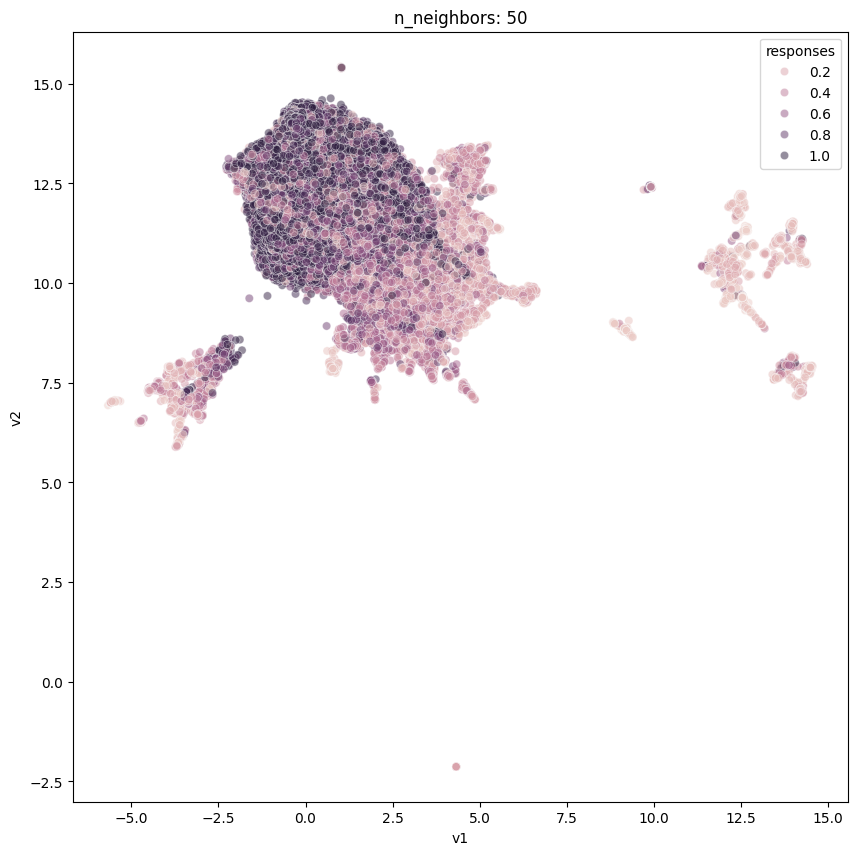

In [14]:
reducer = umap.UMAP(n_neighbors=n_i)
reducer.fit(X)
X_new = reducer.transform(X)
df['v1'] = X_new[:, 0]
df['v2'] = X_new[:, 1]
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('n_neighbors: '+ str(n_i))
sns.scatterplot(data=df, x='v1', y='v2', hue='responses', alpha=0.5)
plt.show()

### Cell lines

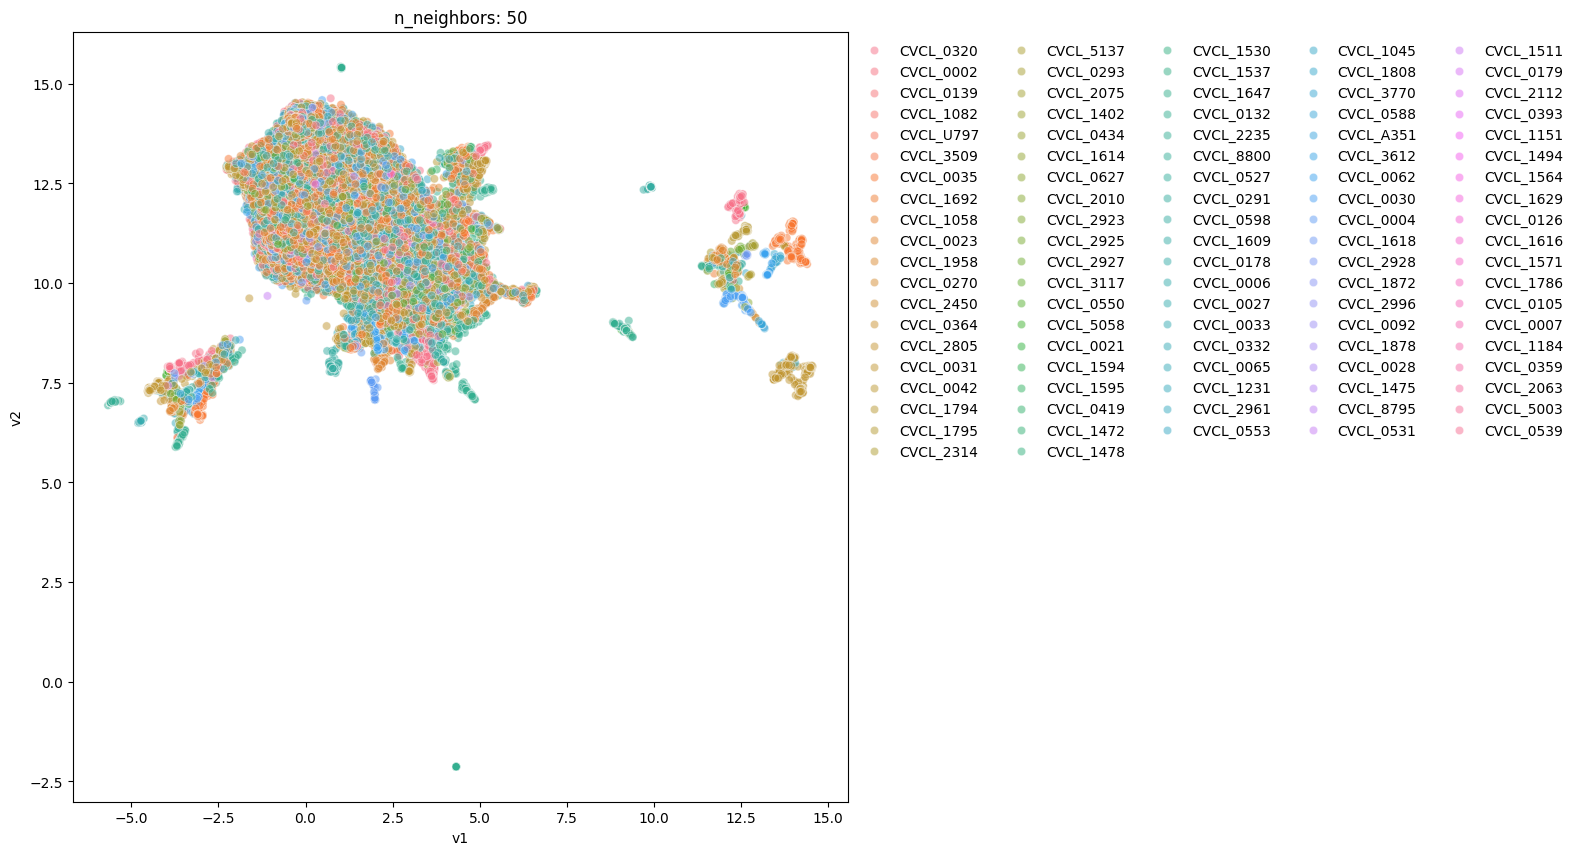

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('n_neighbors: '+ str(n_i))
sns.scatterplot(data=df, x='v1', y='v2', hue='cellosaurus_id', alpha=0.5)
sns.move_legend(
    ax, "upper left",
    bbox_to_anchor=(1, 1), ncol=5, title=None, frameon=False,
)
plt.show()

# Fingerprint features

In [9]:
cols_fingerprints = df.columns[9:2057]

In [11]:
X = df[cols_fingerprints].values

In [13]:
n_i = 50
reducer = umap.UMAP(n_neighbors=n_i)
reducer.fit(X)
X_new = reducer.transform(X)

In [14]:
df['fp_pc1'] = X_new[:, 0]
df['fp_pc2'] = X_new[:, 1]

### Drugs

<Axes: xlabel='fp_pc1', ylabel='fp_pc2'>

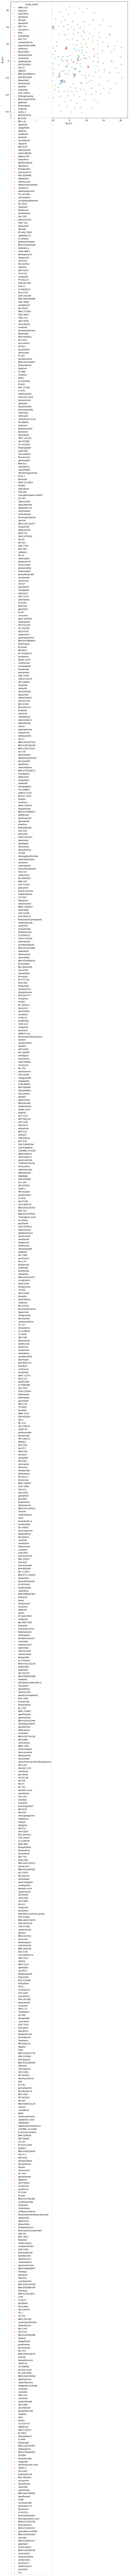

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x='fp_pc1', y='fp_pc2', hue='cmap_name', size = 0.5, alpha=0.5)

### Responses

<Axes: xlabel='fp_pc1', ylabel='fp_pc2'>

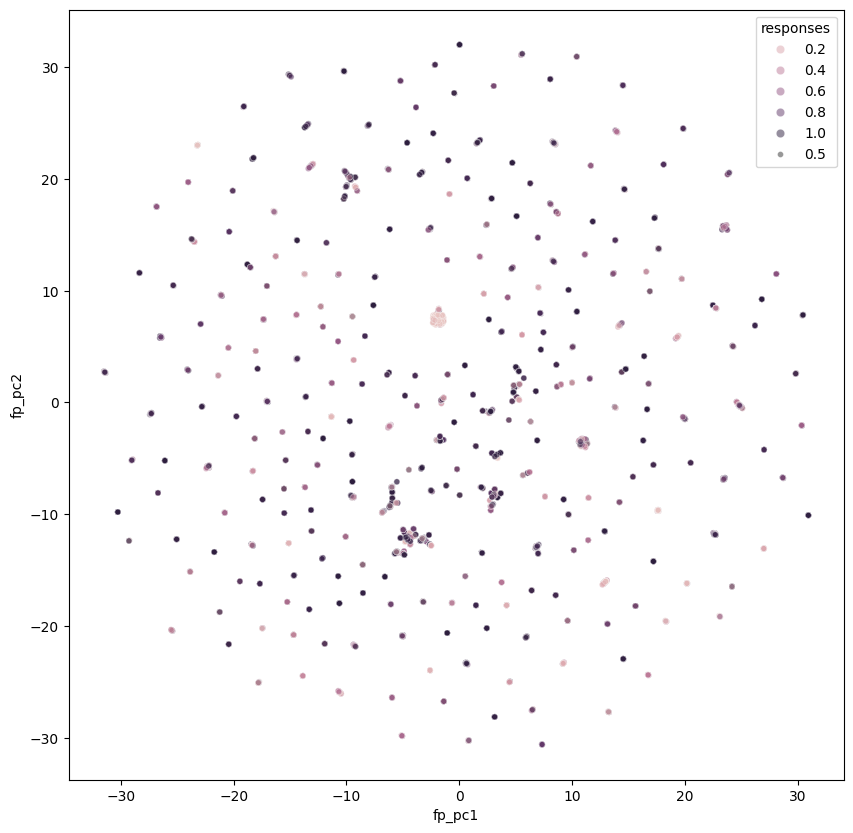

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x='fp_pc1', y='fp_pc2', hue='responses', size = 0.5, alpha=0.5)

### Doses

<Axes: xlabel='fp_pc1', ylabel='fp_pc2'>

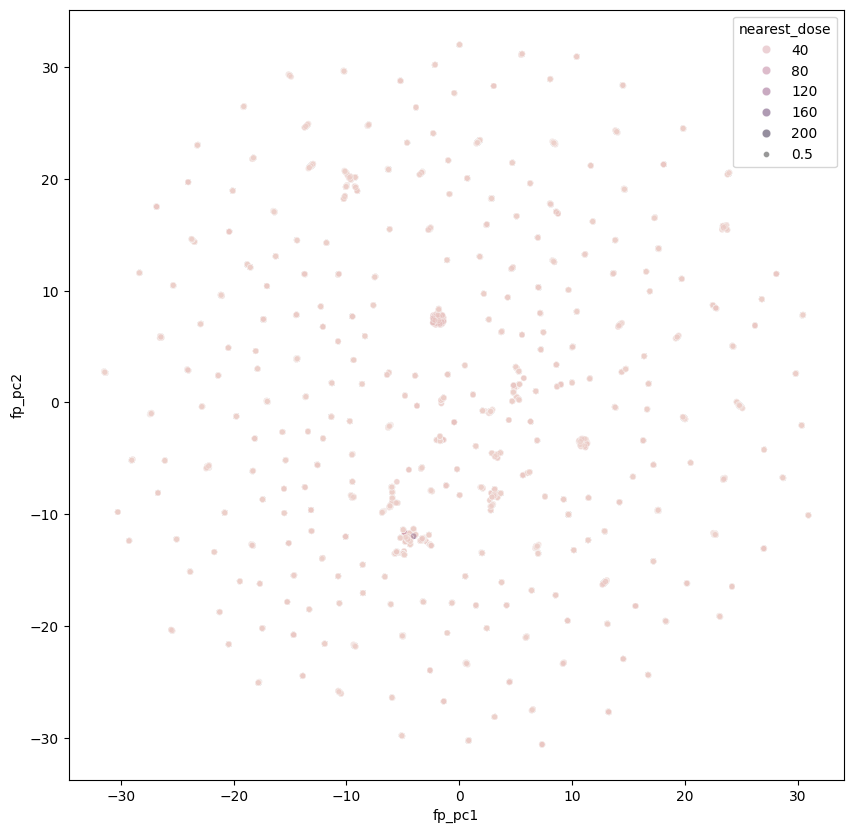

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x='fp_pc1', y='fp_pc2', hue='nearest_dose', size = 0.5, alpha=0.5)

# Dose + Expression + Fingerprint features

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
cols_expr_fp = list(df.columns[9:14385]) + ['nearest_dose']

In [11]:
X = df[cols_expr_fp].values

In [12]:
X_scaled = scaler.fit_transform(X)

In [19]:
n_i = 100
reducer = umap.UMAP(n_neighbors=n_i)
reducer.fit(X_scaled)
X_new = reducer.transform(X_scaled)

In [20]:
df['dose_expr_fp_pc1'] = X_new[:, 0]
df['dose_expr_fp_pc2'] = X_new[:, 1]

### Drugs

<Axes: xlabel='dose_expr_fp_pc1', ylabel='dose_expr_fp_pc2'>

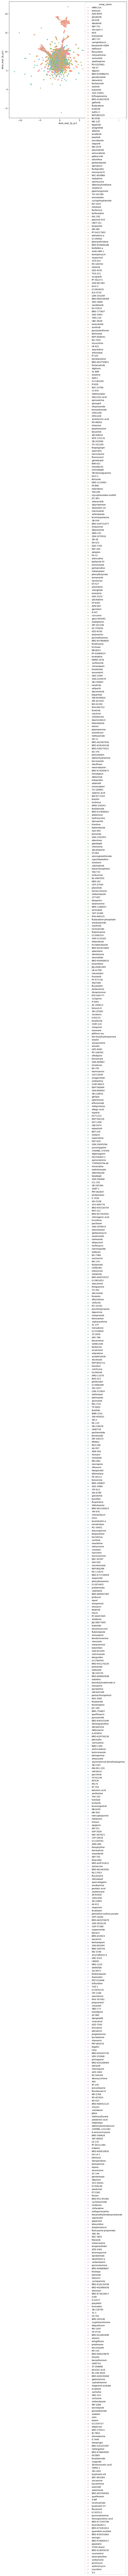

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x='dose_expr_fp_pc1', y='dose_expr_fp_pc2', hue='cmap_name', size = 0.5, alpha=0.5)

### Cell line

<Axes: xlabel='dose_expr_fp_pc1', ylabel='dose_expr_fp_pc2'>

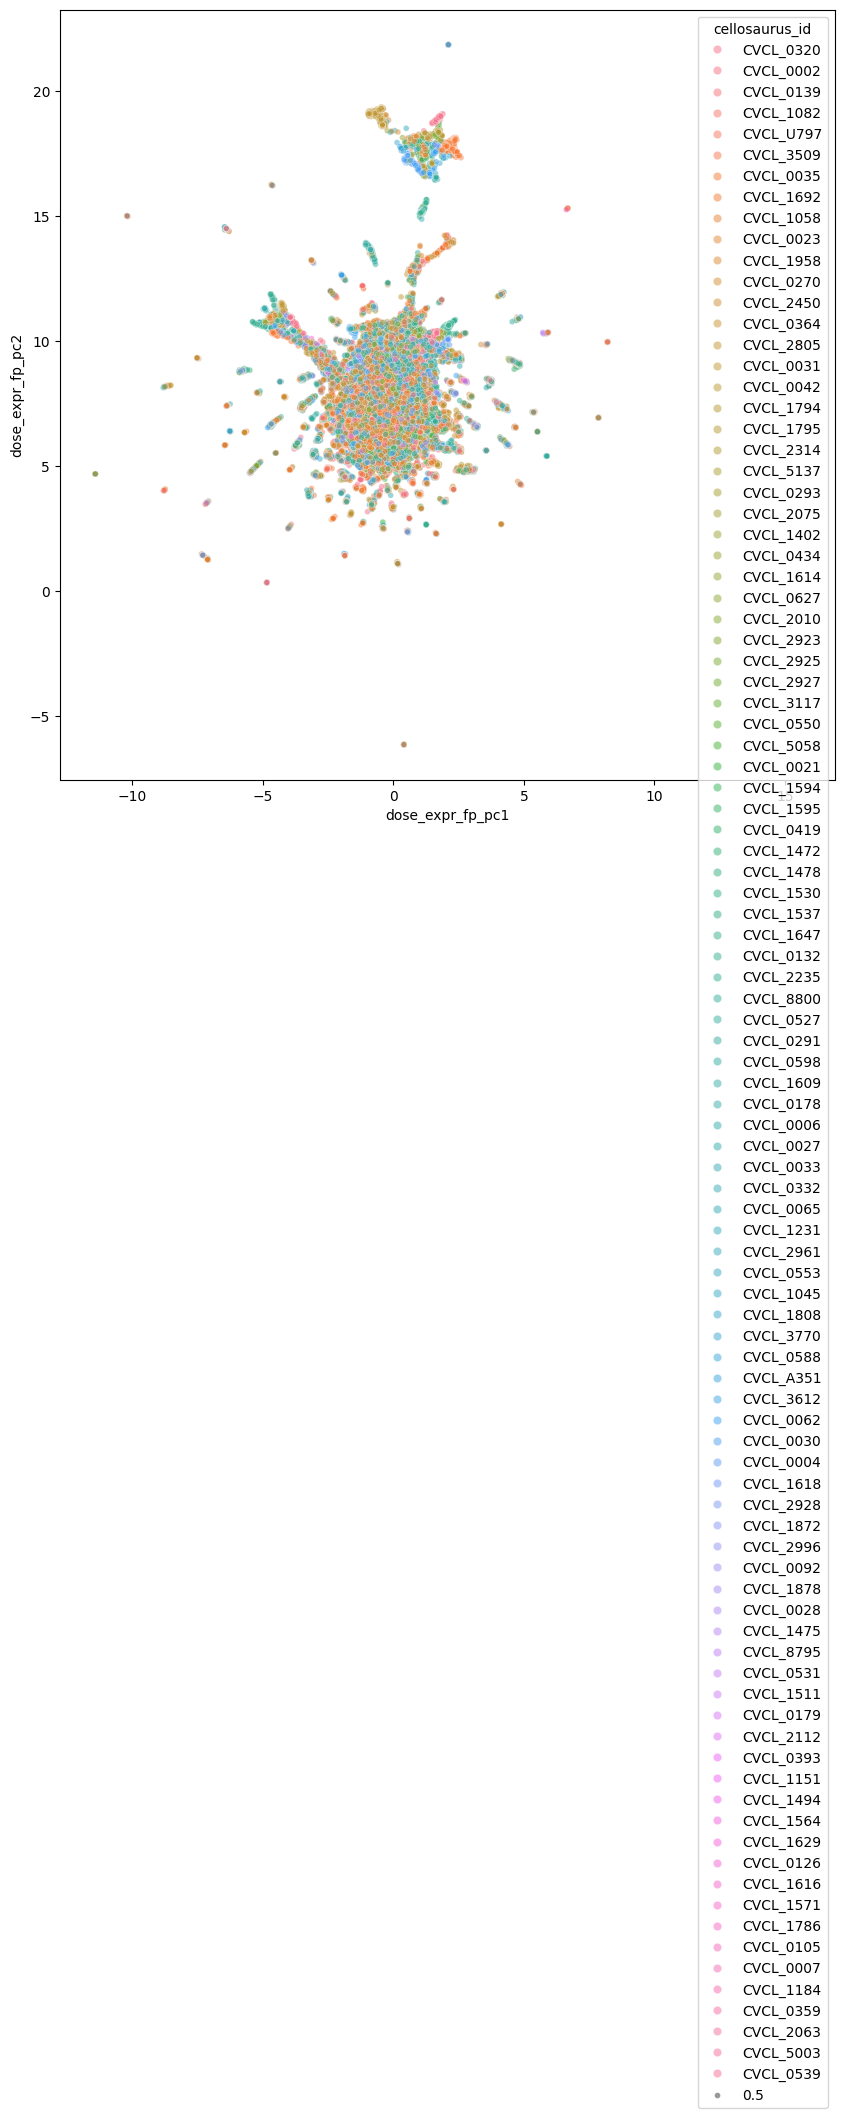

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x='dose_expr_fp_pc1', y='dose_expr_fp_pc2', hue='cellosaurus_id', size = 0.5, alpha=0.5)

### dose

<Axes: xlabel='dose_expr_fp_pc1', ylabel='dose_expr_fp_pc2'>

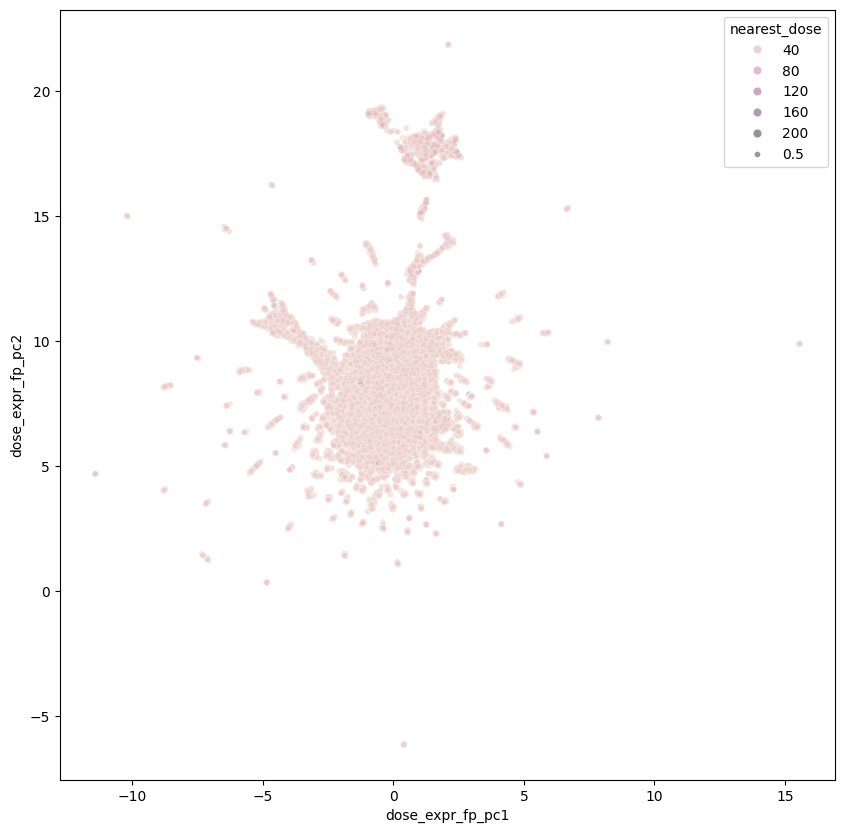

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x='dose_expr_fp_pc1', y='dose_expr_fp_pc2', hue='nearest_dose', size = 0.5, alpha=0.5)

### Responses

<Axes: xlabel='dose_expr_fp_pc1', ylabel='dose_expr_fp_pc2'>

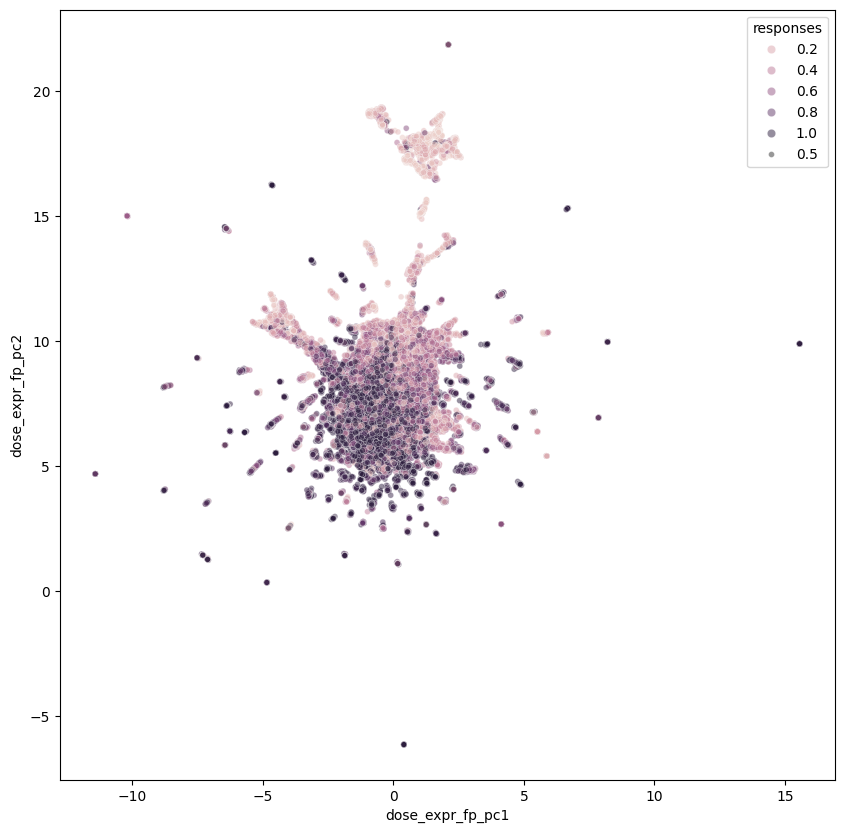

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x='dose_expr_fp_pc1', y='dose_expr_fp_pc2', hue='responses', size = 0.5, alpha=0.5)